In [4]:
$SPARK_HOME/bin/spark-shell


SyntaxError: invalid syntax (900320751.py, line 1)

In [2]:
%pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 9.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 8.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=f0019b96bc8f1e41f6922dc7a9fdc370ad2a7230d3cfd738ae86e813f228dc74
  Stored in directory: /home/amehmood/.cache/pip/wheels/da/78/6d/54350e0243f65f77dccf6ebe2ed5559faf6900559e904fb957
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Python and PySpark code to read and compare a CSV file

# Import necessary libraries
from pyspark.sql import SparkSession
import pandas as pd

# Create a Spark session
spark = SparkSession.builder.appName("SparkPandasComparison").getOrCreate()

# File path to CSV file in WSL
file_path = "/mnt/d/FY2024/myPython/myJupyterNB/adult.csv"

# Read CSV file into a Spark DataFrame
spark_df = spark.read.format("csv").option("header", "true").load(file_path)

# Display first few rows of Spark DataFrame
print("Spark DataFrame (first 5 rows):")
spark_df.show(5)

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = spark_df.toPandas()

# Display first few rows of Pandas DataFrame
print("\nPython Pandas DataFrame (first 5 rows):")
print(pandas_df.head())

# Comparison (showing the first few rows)
print("\nComparison:")
print("Spark DataFrame:")
spark_df.show(5)
print("\nPython Pandas DataFrame:")
print(pandas_df.head())


JAVA_HOME is not set


PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

In [2]:
pip show pyspark


Name: pyspark
Version: 3.5.1
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: /home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages
Requires: py4j
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [14]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("ExampleApp").getOrCreate()

# File path in WSL format
file_path = "/mnt/d/FY2024/myPython/myJupyterNB/adult.csv"

# Read CSV into Spark DataFrame
spark_df = spark.read.csv(file_path, header=True)

# Show first few rows of Spark DataFrame
spark_df.show(5)

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = spark_df.toPandas()

# Display first few rows of Pandas DataFrame
print("\nPandas DataFrame:")
print(pandas_df.head())


+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|age|workclass|fnlwgt|   education|educational-num|    marital-status|       occupation|relationship| race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
| 25|  Private|226802|        11th|              7|     Never-married|Machine-op-inspct|   Own-child|Black|  Male|           0|           0|            40| United-States| <=50K|
| 38|  Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|     Husband|White|  Male|           0|           0|            50| United-States| <=50K|
| 28|Local-gov|336951|  Assoc-acdm|             12|Married-civ-spouse|  Protective-serv|     Husband|White|  M

Pandas DataFrame (X):
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-wee

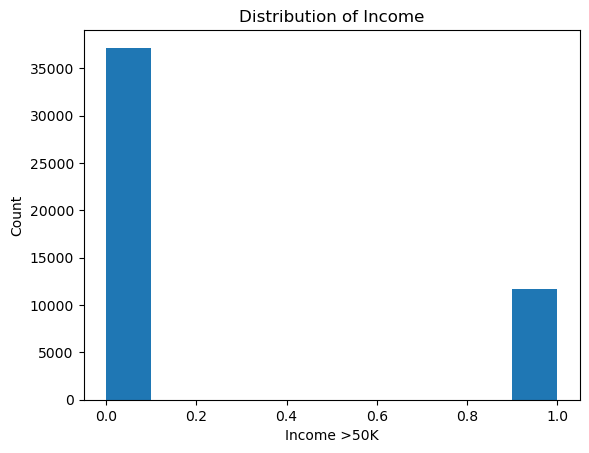

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path = "/mnt/d/FY2024/myPython/myJupyterNB/adult.csv"

# Assuming 'adult.csv' is located in the same directory as your script
# file_path = "adult.csv"

# Read CSV file into Pandas DataFrame
X = pd.read_csv(file_path)

# If necessary, perform data preprocessing (e.g., one-hot encoding, target variable setup)
# For example, if '>50K' is the target variable:
y_true = (X['income'] == '>50K').astype(int)

# Display the Pandas DataFrame and head
print("Pandas DataFrame (X):")
print(X.head())

# Example visualization (optional)
plt.hist(y_true)
plt.xlabel('Income >50K')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'adult.csv' is located in the same directory as your script
# file_path = "adult.csv"

# Read CSV file into Pandas DataFrame
# X = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Pandas DataFrame (X):")
print(X.head())

# Count the number of males and females in the 'Gender' column
gender_counts = X['Gender'].value_counts()
print("\nGender Counts:")
print(gender_counts)

# Convert categorical columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X.drop('income', axis=1))  # Drop target column for now

# Add the target variable to the encoded DataFrame
y_true = (X['income'] == '>50K').astype(int)
X_encoded['income'] = y_true

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded.drop('income', axis=1), y_true, test_size=0.3, random_state=0, stratify=y_true)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Optional: Example visualization of target variable distribution
plt.hist(y_true)
plt.xlabel('Income >50K')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()


Pandas DataFrame (X):
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-wee

KeyError: 'Gender'

Pandas DataFrame (X):
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-wee

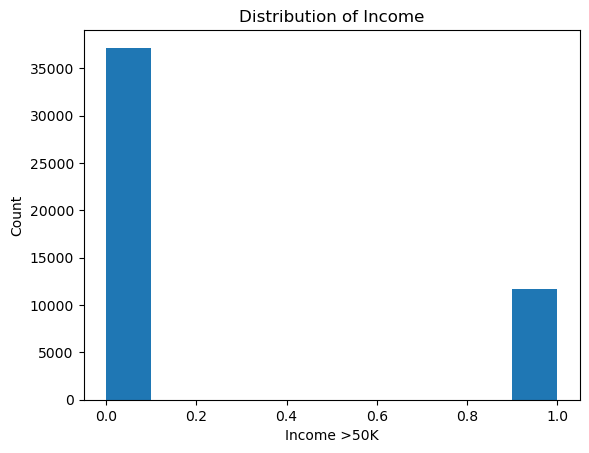

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'adult.csv' is located in the same directory as your script
file_path = "/mnt/d/FY2024/myPython/myJupyterNB/adult.csv"


# Read CSV file into Pandas DataFrame
X = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Pandas DataFrame (X):")
print(X.head())

# Count the number of males and females in the 'Gender' column
gender_counts = X['gender'].value_counts()
print("\nGender Counts:")
print(gender_counts)

# Convert categorical columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X.drop('income', axis=1))  # Drop target column for now

# Add the target variable to the encoded DataFrame
y_true = (X['income'] == '>50K').astype(int)
X_encoded['income'] = y_true

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded.drop('income', axis=1), y_true, test_size=0.3, random_state=0, stratify=y_true)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Optional: Example visualization of target variable distribution
plt.hist(y_true)
plt.xlabel('Income >50K')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

# File path to the CSV file in WSL
file_path = "/mnt/d/FY2024/myPython/myJupyterNB/adult.csv"

# Read CSV file into Pandas DataFrame
X = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Pandas DataFrame (X):")
print(X.head())

# Count the number of males and females in the 'gender' column
gender_counts = X['gender'].value_counts()
print("\nGender Counts:")
print(gender_counts)

# Extract the target variable
y_true = (X['income'] == '>50K').astype(int)

# Convert categorical columns to numerical using one-hot encoding, excluding 'income' and 'gender'
X_encoded = pd.get_dummies(X.drop(['income', 'gender'], axis=1))

# Include the target and 'gender' columns
X_encoded['income'] = y_true
X_encoded['gender'] = X['gender']

# Split the data into train and test sets, stratified by the target variable
X_train, X_test, y_train, y_test = train_test_split(X_encoded.drop('income', axis=1), y_true, test_size=0.3, random_state=0, stratify=y_true)

# Extract the 'gender' column as the sensitive feature
sex_train = X_train['gender']
sex_test = X_test['gender']

# Drop the 'gender' column from the training and test sets
X_train = X_train.drop('gender', axis=1)
X_test = X_test.drop('gender', axis=1)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Custom wrapper functions for metrics
def demographic_parity_diff(y_true, y_pred, sensitive_features, **kwargs):
    return demographic_parity_difference(y_true, y_pred, sensitive_features=sensitive_features, **kwargs)

def equalized_odds_diff(y_true, y_pred, sensitive_features, **kwargs):
    return equalized_odds_difference(y_true, y_pred, sensitive_features=sensitive_features, **kwargs)

# Calculate fairness metrics
metrics = {
    'accuracy': accuracy_score,
    'demographic_parity_difference': demographic_parity_diff,
    'equalized_odds_difference': equalized_odds_diff
}

# Ensure sensitive features match y_true
y_true_test = y_test.reset_index(drop=True)
sex_test = sex_test.reset_index(drop=True)

metric_frame = MetricFrame(metrics=metrics, y_true=y_true_test, y_pred=y_pred, sensitive_features=sex_test)
print(metric_frame.by_group)


Pandas DataFrame (X):
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-wee

TypeError: demographic_parity_diff() missing 1 required positional argument: 'sensitive_features'

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

# File path to the CSV file in WSL
file_path = "/mnt/d/FY2024/myPython/myJupyterNB/adult.csv"

# Read CSV file into Pandas DataFrame
X = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Pandas DataFrame (X):")
print(X.head())

# Count the number of males and females in the 'gender' column
gender_counts = X['gender'].value_counts()
print("\nGender Counts:")
print(gender_counts)

# Extract the target variable
y_true = (X['income'] == '>50K').astype(int)

# Convert categorical columns to numerical using one-hot encoding, excluding 'income' and 'gender'
X_encoded = pd.get_dummies(X.drop(['income', 'gender'], axis=1))

# Include the target and 'gender' columns
X_encoded['income'] = y_true
X_encoded['gender'] = X['gender']

# Split the data into train and test sets, stratified by the target variable
X_train, X_test, y_train, y_test = train_test_split(X_encoded.drop('income', axis=1), y_true, test_size=0.3, random_state=0, stratify=y_true)

# Extract the 'gender' column as the sensitive feature
sex_train = X_train['gender'].reset_index(drop=True)
sex_test = X_test['gender'].reset_index(drop=True)

# Drop the 'gender' column from the training and test sets
X_train = X_train.drop('gender', axis=1).reset_index(drop=True)
X_test = X_test.drop('gender', axis=1).reset_index(drop=True)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate fairness metrics
metrics = {
    'accuracy': accuracy_score,
    'demographic_parity_difference': lambda y_true, y_pred: demographic_parity_difference(y_true, y_pred, sensitive_features=sex_test),
    'equalized_odds_difference': lambda y_true, y_pred: equalized_odds_difference(y_true, y_pred, sensitive_features=sex_test)
}

# Ensure sensitive features match y_true
y_true_test = y_test.reset_index(drop=True)
sex_test = sex_test.reset_index(drop=True)

metric_frame = MetricFrame(metrics=metrics, y_true=y_true_test, y_pred=y_pred, sensitive_features=sex_test)
print(metric_frame.by_group)


Pandas DataFrame (X):
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-wee

ValueError: Found input variables with inconsistent numbers of samples: [14653, 4907]